In [1]:
#imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/home/pi/internship-project/phising_website/db_training_files/phising_08012020_120000.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/pi/internship-project/phising_website/db_training_files/phising_08012020_120000.csv'

In [13]:
# 0 = Not a Phishing, 1 = Phishing.
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [14]:
# column names 
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [15]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [16]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [17]:
# imbalance check 
df['phishing'].value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

Text(0, 0.5, 'Counts')

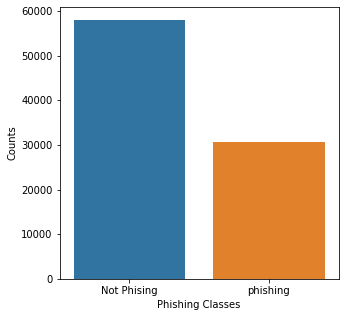

In [18]:
plt.figure(figsize =(5, 5))
sns.barplot(x=["Not Phising","phishing"], y=df.phishing.value_counts(), data=df)
plt.xlabel("Phishing Classes")
plt.ylabel("Counts")

In [19]:
# it is kind of balance so need use any technique to make it balance.

print(f"Not phishing url percentage: {len(df[df.phishing==0]) / len(df)*100}")
print(f"Phishing url percentage: {len(df[df.phishing==1]) / len(df)*100}")

Not phishing url percentage: 65.42804607036899
Phishing url percentage: 34.57195392963101


In [20]:
# missing values. 

df.isnull().sum().value_counts()

0    112
dtype: int64

In [21]:
# Nominal and Ordinal Variables

categorical_variables = [ ]
numerical_variables = [ ]

for col in df.columns:
    if df[col].dtypes == "O":
        categorical_variables.append(col)
    numerical_variables.append(col)
print(f"Number of Categorical variables: {len(categorical_variables)}")
print(f"Number of Numerical variables: {len(numerical_variables)}")

Number of Categorical variables: 0
Number of Numerical variables: 112


In [15]:
y = df['phishing']
df.drop('phishing', inplace=True, axis=1)
X = df

## Feature Selection based on Univariate Filter Method - information gain technique. This is based on the feature importance, not based on the correlation between the features, so it is known as a Univariate Filter Method.

In [5]:
# Selecting 60 top best features.
from sklearn.feature_selection import mutual_info_classif, SelectKBest
selector = SelectKBest(mutual_info_classif, k=60)
selected_features = selector.fit_transform(X, y)

In [20]:
# columns which were selected.
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['qty_slash_url',
 'length_url',
 'qty_dot_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'file_length',
 'qty_dot_params',
 'qty_hyphen_params',
 'qty_underline_params',
 'qty_slash_params',
 'qty_questionmark_params',
 'qty_equal_params',
 'qty_at

In [ ]:
# saving it for the future use.
with open("selected_cols.obj", "wb") as f: 
    pickle.dump(selected_columns, f)
with open("selected_features.obj", "wb") as f: 
    pickle.dump(selected_features, f)

In [32]:
new_X = X[selected_columns]
new_X = pd.DataFrame(new_X)

## From the 60 filtered features, we will see that any features are correlated with each other, then we will remove it.


In [25]:
# Used to find the correlated features. 
corr_dict = {
    
}
corr_set = set()
def find_corr_features(X, threshold): 
    for col1 in range(len(X.columns)-2): 
        for col2 in range(len(X.columns)-1):
            _col1 = X.columns[col1]
            _col2 = X.columns[col2]
            correlation = X[_col1].corr(X[_col2])
            if correlation and correlation>=threshold and _col1!=_col2:
                corr_dict[correlation] = [_col1, _col2]
                corr_set.add(_col1)
                corr_set.add(_col2)
    return corr_dict       

In [35]:
find_corr_features(new_X, 0.90)

{0.9636036959016756: ['qty_slash_directory', 'qty_slash_url'],
 0.9152901786425651: ['qty_dot_directory', 'qty_dot_file'],
 0.9347678331711177: ['qty_underline_file', 'qty_underline_directory'],
 0.978537612490746: ['qty_dollar_file', 'qty_equal_directory'],
 0.9104017475313455: ['qty_dollar_file', 'qty_at_directory'],
 0.9355426957857501: ['qty_hashtag_file', 'qty_and_directory'],
 0.9928814986179745: ['qty_dollar_file', 'qty_exclamation_directory'],
 0.9912588459955871: ['qty_hashtag_file', 'qty_space_directory'],
 0.9882399992486816: ['qty_dollar_file', 'qty_tilde_directory'],
 0.996516042208586: ['qty_dollar_file', 'qty_comma_directory'],
 0.9845893166129341: ['qty_hashtag_file', 'qty_plus_directory'],
 1.0: ['qty_hashtag_file', 'qty_questionmark_file'],
 0.9836397293726418: ['qty_hashtag_file', 'qty_dollar_directory'],
 0.9950495843403657: ['qty_hashtag_file', 'qty_equal_file'],
 0.9993667771007181: ['qty_hashtag_file', 'qty_at_file'],
 0.9969571698575067: ['qty_hashtag_file', 'qt

In [33]:
# removed the columns which are correlated with many columns
new_X.drop(["qty_dollar_file", "qty_equal_directory", "qty_at_directory", "qty_exclamation_directory", "qty_tilde_directory"
           , "qty_comma_directory", "qty_asterisk_file", "qty_space_params", "qty_hashtag_params", "tld_present_params"], axis=1, inplace=True)

In [ ]:
# now, after the feature selection we endup with 50 features.
# saving it for the future use.
with open("selected_cols.obj", "wb") as f: 
    pickle.dump(selected_columns, f)
with open("selected_features.obj", "wb") as f: 
    pickle.dump(selected_features, f)

In [5]:
# Standardization


,qty_slash_url,length_url,qty_dot_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_and_directory,qty_space_directory,...,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_dollar_params,qty_percent_params,qty_params,asn_ip,time_domain_activation,ttl_hostname
0,1,25,2,1,0,0,1,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,60781,-1,892
1,3,223,2,3,0,0,3,0,0,0,...,0,0,0,0,0,0,3,36024,579,9540
2,1,15,2,0,0,0,1,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,4766,-1,589
3,5,81,2,2,0,2,5,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,20454,-1,292
4,0,19,2,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,53831,6998,3597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,0,23,3,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,8560,5509,3597
88643,0,34,2,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,26496,5046,591
88644,5,70,1,1,1,0,5,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,394695,1844,14391
88645,1,28,2,0,0,0,1,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,47583,-1,52


In [4]:
# Doing the Standardization

standard_scaler = StandardScaler()
scaler = standard_scaler.fit(X)
X_stan = scaler.transform(X)

In [11]:
X_stan = pd.DataFrame(data=X_stan, columns=X.columns)

In [12]:
X_stan

,qty_slash_url,length_url,qty_dot_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_and_directory,qty_space_directory,...,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_dollar_params,qty_percent_params,qty_params,asn_ip,time_domain_activation,ttl_hostname
0,-0.148782,-0.245665,0.183359,1.471567,0.327598,0.700459,0.129196,1.074648,0.987315,1.061878,...,-0.302173,-0.294943,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,0.655082,-1.113834,-0.459454
1,0.907230,4.040853,0.183359,3.695039,0.327598,0.700459,1.031673,1.074648,0.987315,1.061878,...,3.304501,3.167623,3.159046,3.299421,3.269403,0.820645,3.994617,0.108102,-0.923305,0.294808
2,-0.148782,-0.462156,0.183359,0.359831,0.327598,0.700459,0.129196,1.074648,0.987315,1.061878,...,-0.302173,-0.294943,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,-0.582511,-1.113834,-0.485881
3,1.963241,0.966683,0.183359,2.583303,0.327598,3.631270,1.934149,1.074648,0.987315,1.061878,...,-0.302173,-0.294943,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,-0.235901,-1.113834,-0.511785
4,-0.676788,-0.375560,0.183359,-0.751905,-0.580345,-0.764946,-0.773280,-0.930537,-0.870557,-0.922403,...,-0.302173,-0.294943,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,0.501529,1.185331,-0.223529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,-0.676788,-0.288964,1.600586,-0.751905,-0.580345,-0.764946,-0.773280,-0.930537,-0.870557,-0.922403,...,-0.302173,-0.294943,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,-0.498686,0.696196,-0.223529
88643,-0.676788,-0.050824,0.183359,-0.751905,-0.580345,-0.764946,-0.773280,-0.930537,-0.870557,-0.922403,...,-0.302173,-0.294943,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,-0.102409,0.544101,-0.485707
88644,1.963241,0.728543,-1.233869,1.471567,1.235540,0.700459,1.934149,1.074648,0.987315,1.061878,...,-0.302173,-0.294943,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,8.032564,-0.507753,0.717902
88645,-0.148782,-0.180718,0.183359,0.359831,0.327598,0.700459,0.129196,1.074648,0.987315,1.061878,...,-0.302173,-0.294943,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,0.363486,-1.113834,-0.532717


In [17]:
# saving the X_Stan and y 
with open("objects/X_stan.obj", "wb") as f: 
    pickle.dump(X_stan, f)
    
with open("objects/y.obj", "wb") as f: 
    pickle.dump(y, f)
    
with open("objects/standard_scaler.obj", 'wb') as f: 
    pickle.dump(standard_scaler, f)